<a href="https://colab.research.google.com/github/charleshart0301/DSPS_cHart/blob/main/HW4/Charles_Hart_MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [179]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G
from astropy import units as u
import pylab as pl
import numpy as np

#package used to display latex formuale
from IPython.display import Latex
import pandas as pd



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [180]:
#example
x = 3
x

3

In [181]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell

x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [182]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newron's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$$ F = \frac{GMm}{r^2}$$

$$m*a = \frac{GMm}{r^2} $$ Here m represents the mass of the smaller object orbiting the larger one. The total force acting on it is just the gravitational force.
$$a = \frac{GM}{r^2}$$ Cancel out the m(s)

$$a*r= \frac{GM}{r}$$ The centrifugal acceleration is equal to $$ \frac{v^2}{r}$$ The r cancels leaving:
$$v^2 = \frac{GM}{r}$$

## M31 rotational curve

### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [183]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv')

In [184]:

print(m31.head())
m31 = m31.drop(0)
m31["err_tot"] = np.sqrt(pd.to_numeric(m31["Rotation"])**2 + pd.to_numeric(m31["Curve"])**2)

     #M31    Grand Rotation     Curve
0  #R(kpc  V(km/s)  St.dev.  St.error
1   0.100  183.939    0.000     0.000
2   0.120  190.710   10.265    12.191
3   0.144  204.141   22.634    21.808
4   0.173  207.601    4.573     4.200


In [185]:

m31.head()

,#M31,Grand,Rotation,Curve,err_tot
1,0.100,183.939,0.000,0.000,0.000000
2,0.120,190.710,10.265,12.191,15.937086
3,0.144,204.141,22.634,21.808,31.430667
4,0.173,207.601,4.573,4.200,6.209052
5,0.207,210.188,3.943,3.258,5.114862


In [186]:
m31.tail()

,#M31,Grand,Rotation,Curve,err_tot
51,910.046,250.377,141.353,22.663,143.158242
52,1092.055,241.900,138.657,39.031,144.045766
53,1310.466,235.039,103.480,46.508,113.450890
54,1572.559,332.734,109.504,54.110,122.143433
55,1887.071,414.942,69.579,27.931,74.975849


# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [187]:
m31.shape

(55, 5)

In [188]:
m31["#M31"] = pd.to_numeric(m31["#M31"])
m31["Grand"] = pd.to_numeric(m31["Grand"])
m31["Rotation"] = pd.to_numeric(m31["Rotation"])
m31["Curve"] = pd.to_numeric(m31["Curve"])

m31.describe(include = 'all')

,#M31,Grand,Rotation,Curve,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,152.201397


In [189]:
m31.median()

,0
#M31,13.737000
Grand,229.124000
Rotation,30.697000
Curve,12.065000
err_tot,32.684957


The most obvious difference between the mean and median is in the #M31 column, which shows the region measured. This indicates that there were a few regions that were significantly larger than the vast majority of the others in the data set.

The rotational speed of the regions is fairly consistent between median and mean indicating that there aren't a lot of outliers there. The curve error is similar.

The dv uncertainty has a reasonable difference between median and mean showing that a few of the HII lines measured had larger errors.


Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

Text(0.5, 1.0, 'Figure 1')

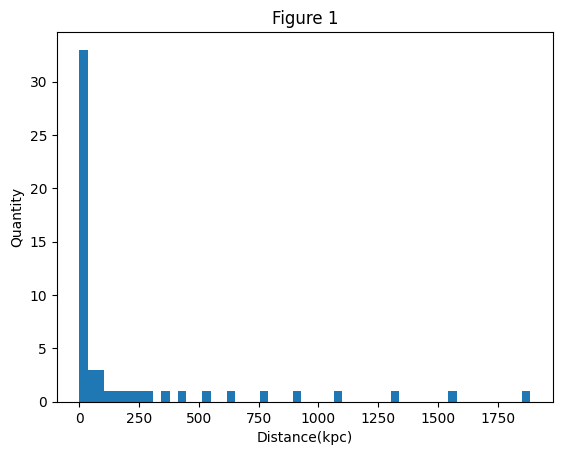

In [190]:
pl.hist(m31["#M31"], bins = 55);
pl.xlabel("Distance(kpc)")
pl.ylabel("Quantity")
pl.title("Figure 1")

This plot maps the distance that measurements took place at. We can see that a huge majority of the measurements were at a fairly close distance.

Text(0.5, 1.0, 'Figure 2')

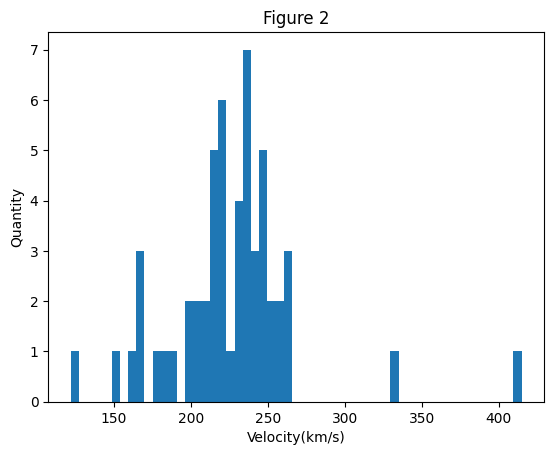

In [191]:
pl.hist(m31["Grand"], bins = 55);
pl.xlabel("Velocity(km/s)")
pl.ylabel("Quantity")
pl.title("Figure 2")

This histogram shows the rotational velocity at certain points in Andromeda mapped versus how many times those velocities appear (or similar values). It is concentrated between 200-250 km/s.

Text(0.5, 1.0, 'Figure 1')

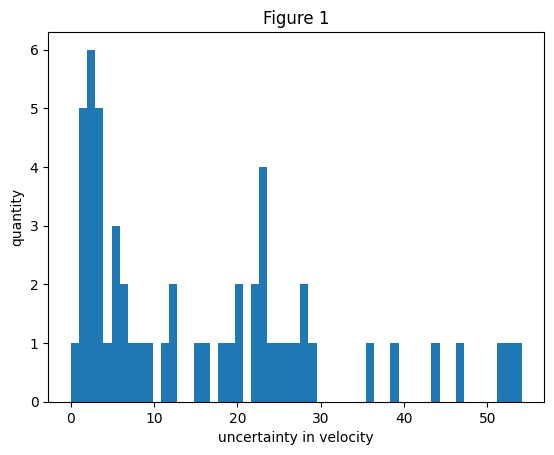

In [212]:
pl.hist(m31["Curve"], bins = 55);
pl.xlabel("uncertainty in velocity")
pl.ylabel("quantity")
pl.title("Figure 3")

This plot shows the uncertainty in rotational velocity. Smaller uncertainties are more common as shown in the histogram.

Text(0.5, 1.0, 'Figure 1')

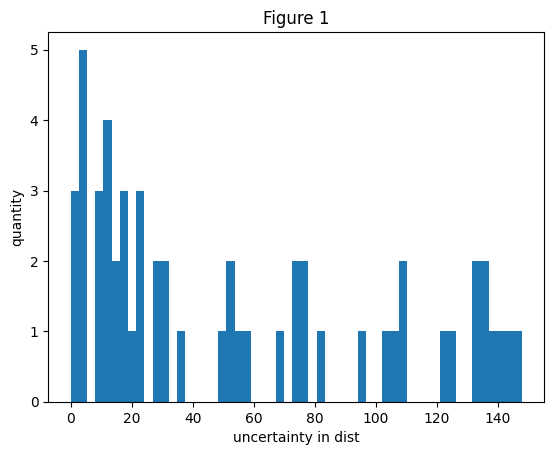

In [211]:
pl.hist(m31["Rotation"], bins = 55);
pl.xlabel("uncertainty in dist")
pl.ylabel("quantity")
pl.title("Figure 4")

This plot is measuring the uncertainty in the measurement of the distance measured. It shows that lower uncertainties are fairly common, whereas larger ones not so much.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

In [194]:
apparentSizeM31 = 3.16

In [195]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell

m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia and me

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [196]:
m31distance = 778 * u.kpc
m31distance_error = 33 * u.kpc


Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [197]:
rad = m31angS.to(u.rad)
m31Size =  m31distance*rad.value
m31SizeError = np.absolute(m31distance_error*rad.value) * np.sqrt((m31distance_error**2)/(m31distance**2))
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 43 kpc +/- 0.1 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [198]:
for i in m31.index:
  if m31.loc[i, "#M31"] >= 43:
    print(m31.loc[i, "#M31"])
    print(m31.loc[i, "Grand"])
    break


49.222
237.069


We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [199]:
m31

,#M31,Grand,Rotation,Curve,err_tot
1,0.100,183.939,0.000,0.000,0.000000
2,0.120,190.710,10.265,12.191,15.937086
3,0.144,204.141,22.634,21.808,31.430667
4,0.173,207.601,4.573,4.200,6.209052
5,0.207,210.188,3.943,3.258,5.114862
6,0.249,213.512,4.218,3.190,5.288442
7,0.299,217.208,3.813,2.623,4.628077
8,0.358,219.673,2.181,1.371,2.576122
9,0.430,219.357,2.193,1.259,2.528701
10,0.516,216.163,3.740,1.961,4.222928


In [200]:
# first measurement including all mass
def getradii(data, N, luminous):
  for i in data.index:
    if data.loc[i, "#M31"] >= N * luminous:
      print(data.loc[i, "#M31"])
      print(data.loc[i, "Grand"])
      return data.loc[i, "#M31"], data.loc[i, "Curve"], data.loc[i, "Grand"], data.loc[i, "Rotation"]
      break
#I'm assuming here that the uncertainty in wavelength corresponds to the rotational speed and the err error is for the radius
m31Rds = 43/2
print(m31Rds)

21.5


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

23.738
236.511
49.222
237.069
70.88
218.489


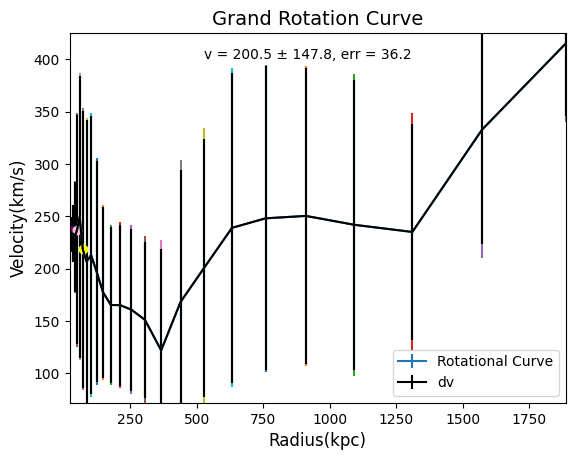

In [201]:
#delete leave plot
def plotGal(gal, rds):
    #1
    rot_curve = gal.plot(x = '#M31', y = 'Grand', yerr = 'Rotation', label = 'Rotational Curve')
    rot_curve.set_xlabel("Radius(kpc)", fontsize=12)
    rot_curve.set_ylabel("Velocity(km/s)", fontsize=12)
    rot_curve.set_title("Grand Rotation Curve", fontsize=14)

    #2
    """
    i = 0
    while i < len(gal):
      if i == 0:
        rot_curve.errorbar(gal.loc[i,'#M31'], gal.loc[i,'Grand'], yerr =  gal.loc[i,'err_tot'], label = 'err_tot 1', color = 'red')
      if i == 1:
        rot_curve.errorbar(gal.loc[i,'#M31'], gal.loc[i,'Grand'], yerr =  gal.loc[i,'err_tot'], label = 'err_tot 1', color = 'green')
      if i == 2:
        rot_curve.errorbar(gal.loc[i,'#M31'], gal.loc[i,'Grand'], yerr =  gal.loc[i,'err_tot'], label = 'err_tot 1', color = 'blue')
      if i == 3:
        i = 0
      i += 1
      continue"""

    colors = ['red', 'green', 'blue']

    for i in gal.index:
          color = colors[i % 3]
          rot_curve.errorbar(gal.loc[i, '#M31'], gal.loc[i, 'Grand'], yerr = gal.loc[i, 'err_tot'])


    #3
    rot_curve.errorbar(gal['#M31'], gal['Grand'], yerr =  gal['Rotation'], label = 'dv', color = 'black')

    #4

    #I was originally confused by what the rds meant in the function here
    #I assume that is it the luminous radius
    highlight1 = getradii(gal, 1, rds)
    rot_curve.plot(highlight1[0], highlight1[2],'o', color = 'purple')
    highlight2 = getradii(gal, 2, rds)
    rot_curve.plot(highlight2[0], highlight2[2], 'o',color = 'pink')
    highlight3 = getradii(gal, 3, rds)
    rot_curve.plot(highlight3[0], highlight3[2], 'o',color = 'yellow')
    #These highlighted points are very hard to see, but they're there near the y-axis.

    #5
    rot_curve.legend(loc='lower right')

    #6
    largest_err_idx = np.argmax(gal['err_tot'])

    pl.text(gal['#M31'].loc[largest_err_idx], gal['Grand'].loc[largest_err_idx] + 200, f'v = {gal['Grand'].loc[largest_err_idx]:.1f} ± {gal['Rotation'].iloc[largest_err_idx]:.1f}, err = {gal['Curve'].iloc[largest_err_idx]:.1f}')
    #Also hard to determine, but this should be referring to the Cyan one.

    #7
    rot_curve.set_xlim(rds, gal['#M31'].max())
    rot_curve.set_ylim(gal['Grand'].min() - 50, gal['Grand'].max() + 10)
plotGal(m31, m31Rds);


Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [202]:
#delete
def vratios(gal, rds, N, err = 'dv'):
  velocity_at = getradii(gal, N, rds)[2]
  expected_drop = getradii(gal, 1, rds)[2] / np.sqrt(getradii(gal, N, rds)[0])
  calculated_velocity_ratio = getradii(gal, 1, rds)[2] / getradii(gal, N, rds)[2]
  expected_ratio_radii = np.sqrt(getradii(gal, 1, rds)[0] / getradii(gal, N, rds)[0])
  #if err == 'dv':
  unc_1 = getradii(gal, 1, rds)[3]
  unc_N = getradii(gal, N, rds)[3]
  expected_velo_unc = np.absolute(getradii(gal, 1, rds)[2]/getradii(gal, N, rds)[2]) * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[2])**2 + (unc_N**2)/(getradii(gal, N, rds)[2])**2)
  if err == 'err':
    unc_1 = getradii(gal, 1, rds)[1]
    unc_N = getradii(gal, N, rds)[1]
  expected_rad_unc = np.absolute(getradii(gal, 1, rds)[0]/getradii(gal, N, rds)[0]) * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[0])**2 + (unc_N**2)/(getradii(gal, N, rds)[0])**2)

  sigmaupper_vel = np.absolute(getradii(gal, 1, rds)[2]/getradii(gal, N, rds)[2]) + 2 * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[2])**2 + (unc_N**2)/(getradii(gal, N, rds)[2])**2)
  sigmalower_vel = np.absolute(getradii(gal, 1, rds)[2]/getradii(gal, N, rds)[2]) - 2 * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[2])**2 + (unc_N**2)/(getradii(gal, N, rds)[2])**2)

  sigmaupper_rad = np.absolute(getradii(gal, 1, rds)[0]/getradii(gal, N, rds)[0]) + 2 * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[0])**2 + (unc_N**2)/(getradii(gal, N, rds)[0])**2)
  sigmalower_rad =  np.absolute(getradii(gal, 1, rds)[0]/getradii(gal, N, rds)[0]) - 2* np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[0])**2 + (unc_N**2)/(getradii(gal, N, rds)[0])**2)

  test = False
  if sigmalower_rad <= expected_rad_unc <= sigmaupper_rad:
    test = True
  if sigmalower_vel <= expected_velo_unc <= sigmaupper_vel:
    test = True


  print("The expected radius ratio is: " + str(expected_ratio_radii))
  print("The calculated velocity ratio is: " + str(calculated_velocity_ratio) + " +/- " + str(expected_velo_unc))
  print("The 2-sigma upper limit is: " + str(sigmaupper_vel) + " +/- " + str(expected_velo_unc))
  print("The 2-sigma lower limit is: " + str(sigmalower_vel) + " +/- " + str(expected_velo_unc))
  print("The expected ratio is within the 2-sigma of the calculated ratio: " + str(test))

In [203]:
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')
#The way that I wrote get_radii makes this a mess, but I kept the print() in because I think it helps demonstrate my thought process when writing the code

23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
The expected radius ratio is: 1.0
The calculated velocity ratio is: 1.0 +/- 0.07013335901109899
The 2-sigma upper limit is: 1.140266718022198 +/- 0.07013335901109899
The 2-sigma lower limit is: 0.8597332819778021 +/- 0.07013335901109899
The expected ratio is within the 2-sigma of the calculated ratio: True
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23.738
236.511
23

In [204]:
vratios(m31, m31Rds, 2)

49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
The expected radius ratio is: 0.6944523225391628
The calculated velocity ratio is: 0.9976462548878176 +/- 0.4629541312641718
The 2-sigma upper limit is: 1.9257390112049946 +/- 0.4629541312641718
The 2-sigma lower limit is: 0.06955349857064053 +/- 0.4629541312641718
The expected ratio is within the 2-sigma of the calculated ratio: True


In [205]:
vratios(m31, m31Rds, 2, err='err')

49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
23.738
236.511
49.222
237.069
The expected radius ratio is: 0.6944523225391628
The calculated velocity ratio is: 0.9976462548878176 +/- 0.4629541312641718
The 2-sigma upper limit is: 1.1999195400704967 +/- 0.4629541312641718
The 2-sigma lower limit is: 0.7953729697051384 +/- 0.4629541312641718
The expected ratio is within the 2-sigma of the calculated ratio: True


### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

      #MW    Grand Rotation     Curve
0  R(kpc)  V(km/s)  St.dev.  St.error
1   0.010  119.061   41.832    32.714
2   0.012  115.268   35.199    17.100
3   0.014  117.392   35.152    14.429
4   0.017  118.475   35.252    14.870


KeyError: '#M31'

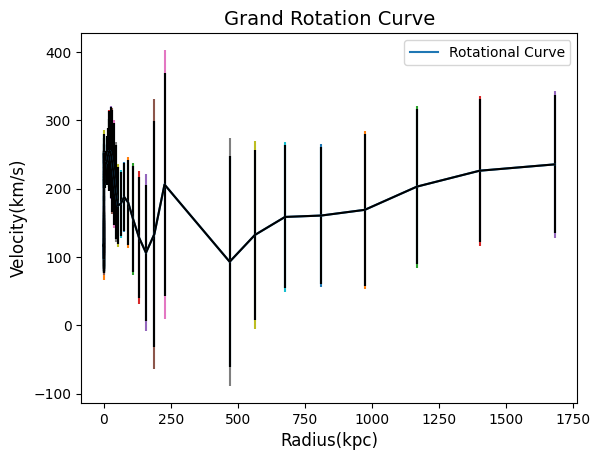

In [210]:
m = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/mw.csv')

print(m.head())
m = m.drop(0)
m["err_tot"] = np.sqrt(pd.to_numeric(m["Rotation"])**2 + pd.to_numeric(m["Curve"])**2)
m["#MW"] = pd.to_numeric(m["#MW"])
m["Grand"] = pd.to_numeric(m["Grand"])
m["Rotation"] = pd.to_numeric(m["Rotation"])
m["Curve"] = pd.to_numeric(m["Curve"])

def getradii_m(data, N, luminous):
  for i in data.index:
    if data.loc[i, "#MW"] >= N * luminous:
      print(data.loc[i, "#MW"])
      print(data.loc[i, "Grand"])
      return data.loc[i, "#MW"], data.loc[i, "Curve"], data.loc[i, "Grand"], data.loc[i, "Rotation"]
      break

def plotGal_m(gal, rds):
    #1
    rot_curve = gal.plot(x = '#MW', y = 'Grand', yerr = 'Rotation', label = 'Rotational Curve')
    rot_curve.set_xlabel("Radius(kpc)", fontsize=12)
    rot_curve.set_ylabel("Velocity(km/s)", fontsize=12)
    rot_curve.set_title("Grand Rotation Curve", fontsize=14)

    #2


    colors = ['red', 'green', 'blue']

    for i in gal.index:
          color = colors[i % 3]
          rot_curve.errorbar(gal.loc[i, '#MW'], gal.loc[i, 'Grand'], yerr = gal.loc[i, 'err_tot'])


    #3
    rot_curve.errorbar(gal['#MW'], gal['Grand'], yerr =  gal['Rotation'], label = 'dv', color = 'black')

    #4

    #I was originally confused by what the rds meant in the function here
    #I assume that is it the luminous radius
    highlight1 = getradii(gal, 1, rds)
    rot_curve.plot(highlight1[0], highlight1[2],'o', color = 'purple')
    highlight2 = getradii(gal, 2, rds)
    rot_curve.plot(highlight2[0], highlight2[2], 'o',color = 'pink')
    highlight3 = getradii(gal, 3, rds)
    rot_curve.plot(highlight3[0], highlight3[2], 'o',color = 'yellow')
    #These highlighted points are very hard to see, but they're there near the y-axis.

    #5
    rot_curve.legend(loc='lower right')

    #6
    largest_err_idx = np.argmax(gal['err_tot'])

    pl.text(gal['#MW'].loc[largest_err_idx], gal['Grand'].loc[largest_err_idx] + 200, f'v = {gal['Grand'].loc[largest_err_idx]:.1f} ± {gal['Rotation'].iloc[largest_err_idx]:.1f}, err = {gal['Curve'].iloc[largest_err_idx]:.1f}')
    #Also hard to determine, but this should be referring to the Cyan one.

    #7
    rot_curve.set_xlim(rds, gal['#MW'].max())
    rot_curve.set_ylim(gal['Grand'].min() - 50, gal['Grand'].max() + 10)

plotGal_m(m, 30);

#delete
def vratios_m(gal, rds, N, err = 'dv'):
  velocity_at = getradii(gal, N, rds)[2]
  expected_drop = getradii(gal, 1, rds)[2] / np.sqrt(getradii(gal, N, rds)[0])
  calculated_velocity_ratio = getradii(gal, 1, rds)[2] / getradii(gal, N, rds)[2]
  expected_ratio_radii = np.sqrt(getradii(gal, 1, rds)[0] / getradii(gal, N, rds)[0])
  #if err == 'dv':
  unc_1 = getradii(gal, 1, rds)[3]
  unc_N = getradii(gal, N, rds)[3]
  expected_velo_unc = np.absolute(getradii(gal, 1, rds)[2]/getradii(gal, N, rds)[2]) * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[2])**2 + (unc_N**2)/(getradii(gal, N, rds)[2])**2)
  if err == 'err':
    unc_1 = getradii(gal, 1, rds)[1]
    unc_N = getradii(gal, N, rds)[1]
  expected_rad_unc = np.absolute(getradii(gal, 1, rds)[0]/getradii(gal, N, rds)[0]) * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[0])**2 + (unc_N**2)/(getradii(gal, N, rds)[0])**2)

  sigmaupper_vel = np.absolute(getradii(gal, 1, rds)[2]/getradii(gal, N, rds)[2]) + 2 * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[2])**2 + (unc_N**2)/(getradii(gal, N, rds)[2])**2)
  sigmalower_vel = np.absolute(getradii(gal, 1, rds)[2]/getradii(gal, N, rds)[2]) - 2 * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[2])**2 + (unc_N**2)/(getradii(gal, N, rds)[2])**2)

  sigmaupper_rad = np.absolute(getradii(gal, 1, rds)[0]/getradii(gal, N, rds)[0]) + 2 * np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[0])**2 + (unc_N**2)/(getradii(gal, N, rds)[0])**2)
  sigmalower_rad =  np.absolute(getradii(gal, 1, rds)[0]/getradii(gal, N, rds)[0]) - 2* np.sqrt((unc_1**2)/(getradii(gal, 1, rds)[0])**2 + (unc_N**2)/(getradii(gal, N, rds)[0])**2)

  test = False
  if sigmalower_rad <= expected_rad_unc <= sigmaupper_rad:
    test = True
  if sigmalower_vel <= expected_velo_unc <= sigmaupper_vel:
    test = True


  print("The expected radius ratio is: " + str(expected_ratio_radii))
  print("The calculated velocity ratio is: " + str(calculated_velocity_ratio) + " +/- " + str(expected_velo_unc))
  print("The 2-sigma upper limit is: " + str(sigmaupper_vel) + " +/- " + str(expected_velo_unc))
  print("The 2-sigma lower limit is: " + str(sigmalower_vel) + " +/- " + str(expected_velo_unc))
  print("The expected ratio is within the 2-sigma of the calculated ratio: " + str(test))

https://en.wikipedia.org/wiki/Milky_Way
    